<a href="https://colab.research.google.com/github/gabrieluz/Atividade-Ciencia-de-Dados/blob/main/AtividadeDimaOfc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade TADS


In [202]:
#Imports usados no notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from numpy.testing import assert_approx_equal

%matplotlib inline

# Importante não mudar essa seed pois sua atividade será avaliada baseada nos resultados dessa seed
np.random.seed(123)

## 1. Importar o dataset no pandas (`pd.read_csv`):

###  1.1 se atentar com os `index_col`.
###  1.2 especificar os `dtypes` -- tem muita variável qualitativa nesse dataset. Usar o argumento `dtype` do `pd.read_csv` que aceita um dicionário. Ver a documentação do pandas.

In [203]:
# 1. Importar no Pandas
df = pd.read_csv('https://github.com/storopoli/ciencia-de-dados/raw/master/notebooks/data/diamonds.csv', index_col=0, dtype={'carat':float,'cut':str, 'color':str, 'clarity': str, 'depth':float, 'table':float, 'price':int, 'x':float, 'y':float, 'z':float})

## 2. Calcular algumas estatísticas dos dados com pandas `groupby`:

###  2.1 Média e Mediana do `price` por `cut` * Guardar em variáveis: `mean_price_cut` e `median_price_cut`.

In [204]:
# 2. Groupbys
mean_price_cut = df['price'].groupby(df['cut']).mean()
median_price_cut = df['price'].groupby(df['cut']).median()

###  2.2 Média e Mediana do `carat` por `color` * Guardar em variáveis: `mean_carat_color` e `median_carat_color`.


In [214]:
mean_carat_color = df['carat'].groupby(df['color']).mean()
median_carat_color = df['carat'].groupby(df['color']).median()

## 3. Fazer alguns gráficos dos dados com o matplotlib.pyplot (Obs: pode usar direto a API do pandas para gráficos `Pd.plot`):

### 3.1 Histograma `hist` da variável `price`. Adicionar um título com `plt.title()` e adicionar os rótulos do eixo X e Y `plt.xlab()` e `plt.ylabel()`.

In [ ]:
# 3. Plots
# Plot grafico da variavel 'price'
# df['price'].plot(kind='hist') # outra forma
plt.hist(df['price'], edgecolor='b')
plt.title('Tabela Frequência de Preços de Diamantes')
plt.ylabel('Frequência')
plt.xlabel('Preço')
plt.show()

### 3.2 Gráfico de barras `bar` da variável `cut` (cuidado com o `Pd.Series.value_counts()`). Adicionar um título com `plt.title()` e adicionar os rótulos do eixo X e Y `plt.xlab()` e `plt.ylabel()`.

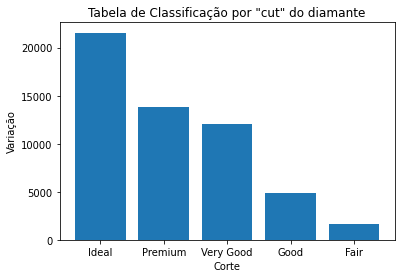

In [206]:
df_cut_x = df.value_counts('cut').index # faz a legenda ficar horizontal
df_cut = df.value_counts('cut')
# df_cut.plot.bar()
plt.bar(df_cut_x, df_cut)
plt.title('Tabela de Classificação por "cut" do diamante')
plt.ylabel('Variação')
plt.xlabel('Corte')
plt.show()

## 4. Preparar os dados para o Scikit-Learn
#####  Pré-processamento Scikit-Learn
  

### 4.1 Codificar as variáveis qualitativas `cut`, `color` e `clarity` com dummies (OBS: atividade já realizada, inserida apenas para aprendizagem)

In [207]:
df_final = pd.get_dummies(df, columns=['cut', 'color', 'clarity'])

### 4.2 Criar o dataset `X` com todas as variáveis do `df_final` **menos** `price`.

In [208]:
X = df_final.drop(columns=['price'])

### 4.3 Criar a resposta `y` **somente** com `price`.

In [209]:
Y = df_final['price']

### 4.4 Quebrar em dados de treino e de teste com o `train_test_split`. Usar o padrão `test_size = 0.25`. **Não passar seed** no `random_state` pois estamos já setando uma global com o `np.random.seed`.

In [210]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25)

## 5. Treinar um modelo `LinearRegression` do Scikit-Learn para prever o `price` do diamante:

### 5.1 Reportar o erro absoluto médio `mean_absolute_error` do seu modelo nos dados de treino e dados de teste. Guardar em variáveis `mae_train` e `mae_test`.

In [211]:
clf = LinearRegression()
clf.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [212]:
Y_pred_train = clf.predict(X_train)
mae_train = mean_absolute_error(Y_pred_train, Y_train)

Y_pred_test = clf.predict(X_test)
mae_test = mean_absolute_error(Y_pred_test, Y_test)

print(f"MAE Treino: {format(mae_train,'.6f')}")
print(f"MAE Teste: {format(mae_test, '.6f')}")
# print(f"MAE Treino: {mae_train:.6f}")
# print(f"MAE Teste: {mae_test:.6f}")

MAE Treino: 742.023938
MAE Teste: 741.971044


In [213]:
# Groupbys
assert_approx_equal(mean_price_cut['Good'], 3928.8644)
assert_approx_equal(median_price_cut['Fair'], 3282)
assert_approx_equal(mean_carat_color['D'], 0.657794833)
assert_approx_equal(median_carat_color['H'], 0.9)

# MAEs
assert_approx_equal(mae_train, 742.023938)
# assert_approx_equal(mae_train, 739.279089)
assert_approx_equal(mae_test, 741.971044)
# assert_approx_equal(mae_test, 742.026558)